# **1. Data Cleaning**

In [1]:
! pip install datasets
! pip install hazm
! pip install persiantools

import pandas as pd
import numpy as np
from datasets import load_dataset
import re
from hazm import Normalizer, WordTokenizer, Lemmatizer, stopwords_list
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt_tab')
from persiantools.jdatetime import JalaliDate
import seaborn as sns
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.8.4.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cufft-cu12==11.2.1.3; platform_system == "Linux" and platform_machine == "x86_64", but you 

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# Load data
ds = load_dataset("divaroffical/real_estate_ads")
df = ds['train'].to_pandas()
print("Shape:", df.shape)
pd.set_option("display.max_columns", None)
df.head()

README.md:   0%|          | 0.00/6.22k [00:00<?, ?B/s]

real_estate_ads.csv:   0%|          | 0.00/781M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Shape: (1000000, 60)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_water,has_warm_water_provider,has_electricity,has_gas,has_heating_system,has_cooling_system,has_restroom,has_security_guard,has_barbecue,building_direction,has_pool,has_jacuzzi,has_sauna,floor_material,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,None,NaN,NaN,None,None,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,500.0,None,None,None,سه,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,None,NaN,NaN,None,مقطوع,8.500000e+09,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,60.0,None,None,3,یک,None,None,None,True,True,True,۱۳۸۴,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,None,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,None,None,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN,NaN,132.0,None,None,3,سه,None,None,None,True,True,True,۱۴۰۱,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,None,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,None,None,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN,NaN,90.0,None,None,4,یک,None,None,None,True,False,True,۱۴۰۰,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,None,NaN,NaN,None,مقطوع,5.750000e+09,None,NaN,None,None,NaN,NaN,NaN,NaN,NaN,115.0,single_page,None,4,دو,6,None,true,True,True,True,۱۴۰۳,None,None,package,None,None,shoofaj,air_conditioner,squat_seat,None,None,north,None,None,None,ceramic,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Basic text cleaning
normalizer = Normalizer()
tokenizer = WordTokenizer()
lemmatizer = Lemmatizer()
stopwords = set(stopwords_list())

In [4]:
# Persian to English digit map
persian_digit_map = str.maketrans("۰۱۲۳۴۵۶۷۸۹", "0123456789")

# Function to convert a column with Persian digits to numeric
def convert_persian_digits(column):
    return pd.to_numeric(
        column.astype(str).str.translate(persian_digit_map),
        errors='coerce'  # Convert invalid ones (like 'nan' or 'None') to NaN
    )

# Apply to 'construction_year' and 'rooms_count'
df['construction_year'] = convert_persian_digits(df['construction_year'])
df['rooms_count'] = convert_persian_digits(df['rooms_count'])

# Drop unrealistic or missing years (e.g., less than 1300 or greater than 1500 in the Persian calendar)
df = df[df['construction_year'].between(1300, 1500, inclusive='both')]

# Remove rows with missing construction_year (both None and NaN)
df = df[~df['construction_year'].isnull()]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [5]:
# Normalize all price-related columns
price_columns = [
    'price_value', 'credit_value', 'rent_value',
    'transformable_price', 'transformable_credit', 'transformable_rent',
    'transformed_rent', 'transformed_credit',
    'rent_price_on_regular_days', 'rent_price_on_special_days',
    'rent_price_at_weekends', 'cost_per_extra_person'
]

def normalize_price(value):
    try:
        if pd.isna(value): return np.nan
        return float(str(value).replace(",", "").strip())
    except:
        return np.nan

for col in price_columns:
    df[col] = df[col].apply(normalize_price)

# Calculate unified price
def calculate_unified_price(row):
    # Use price_value if available
    if pd.notna(row['price_value']):
        return row['price_value']

    # Use credit_value * coefficient based on construction year
    credit = row['credit_value']
    year = row['construction_year']
    tr_credit = row['transformed_credit']

    if pd.notna(credit) and pd.notna(year):
        if year >= 1400:
            return credit * 6
        elif 1390 <= year < 1400:
            return credit * 5
        elif year < 1390:
            return credit * 4
    elif pd.notna(tr_credit):
        if year >= 1400:
            return tr_credit * 6
        elif 1390 <= year < 1400:
            return tr_credit * 5
        elif year < 1390:
            return tr_credit * 4

    # Short-term pricing (daily rent)
    if not pd.isna(row['rent_price_on_regular_days']):
        return row['rent_price_on_regular_days'] * 1000

    return np.nan  # If all else fails

# Apply to DataFrame
df['unified_price'] = df.apply(calculate_unified_price, axis=1)

In [6]:
df = df[df['unified_price'].notna()]
df.dropna(subset=['description', 'building_size'], inplace=True)

In [7]:
# IQR outlier remove
def remove_outliers_iqr(df, columns):
    mask = pd.Series([True] * len(df), index=df.index)

    for col in columns:
        Q_25 = df[col].quantile(0.25)
        Q_85 = df[col].quantile(0.85)
        IQR = Q_85 - Q_25
        lower = Q_25 - 1.5 * IQR
        upper = Q_85 + 1.75 * IQR
        mask &= df[col].between(lower, upper)

    return df[mask]

In [8]:
# before after boxplot
def plot_before_after(df_before, df_after, columns):
    for col in columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.boxplot(x=df_before[col])
        plt.title(f"{col} (Before Cleaning)")

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df_after[col])
        plt.title(f"{col} (After Cleaning)")

        plt.tight_layout()
        plt.show()

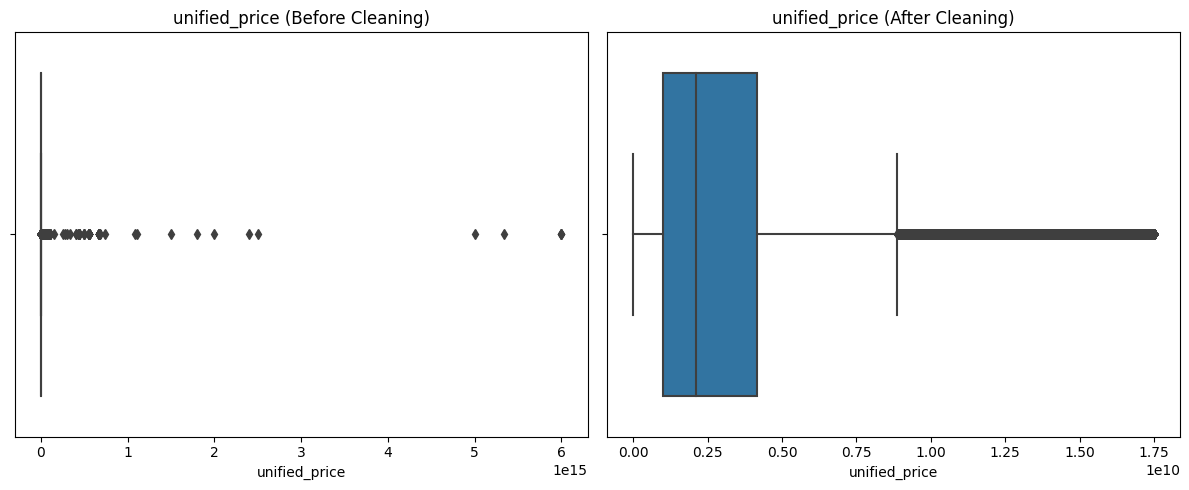

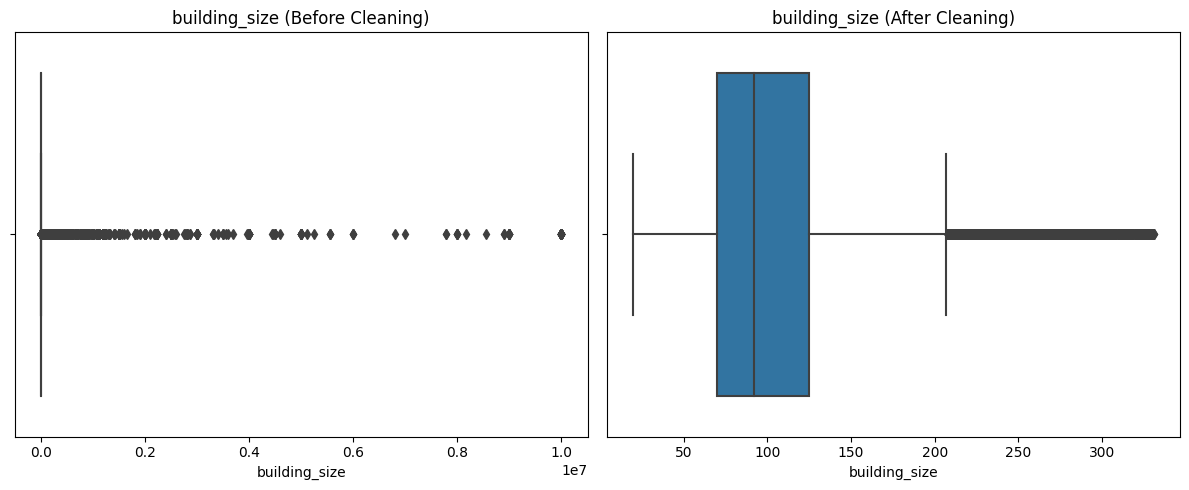

In [9]:
cols_to_clean = ['unified_price', 'building_size']

df_before = df.copy()
df = remove_outliers_iqr(df, cols_to_clean)

df = df[df['building_size'] >= 20]

plot_before_after(df_before, df, cols_to_clean)

In [10]:
# Step 1: Make sure both columns are strings
df['property_type'] = df['property_type'].astype(str)
df['cat3_slug'] = df['cat3_slug'].astype(str)

# Step 2: Concatenate original property_type to cat3_slug if it's not null or 'nan'
df['cat3_slug'] = df.apply(
    lambda row: row['cat3_slug'] + '-' + row['property_type']
    if row['property_type'].lower() != 'none' else row['cat3_slug'],
    axis=1
)

# Step 3: Drop the old 'property_type' column
df = df.drop(columns=['property_type'])

df = df.rename(columns={'cat2_slug': 'listing_type', 'cat3_slug': 'property_type'})

target_col = 'property_type'
df = df[df[target_col].notna()]
df[target_col] = df[target_col].str.replace(r'\b(-sell|-rent)\b', '' , case = False, regex = True)
df[target_col] = df[target_col].str.strip('-').str.replace(r'-{2,}', '-', regex = True).str.strip()
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,listing_type,property_type,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,total_floors_count,unit_per_floor,has_balcony,has_elevator,has_warehouse,has_parking,construction_year,is_rebuilt,has_water,has_warm_water_provider,has_electricity,has_gas,has_heating_system,has_cooling_system,has_restroom,has_security_guard,has_barbecue,building_direction,has_pool,has_jacuzzi,has_sauna,floor_material,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,unified_price
1,residential-sell,apartment,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,None,NaN,NaN,None,مقطوع,8.500000e+09,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,60.0,None,None,3,NaN,None,None,None,True,True,True,1384.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,500.0,8.500000e+09
2,residential-rent,apartment,tehran,tohid,2024-10-01 00:00:00,None,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,None,None,NaN,مقطوع,750000000.0,False,NaN,750000000.0,NaN,26000000.0,NaN,NaN,132.0,None,None,3,NaN,None,None,None,True,True,True,1401.0,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN,4.500000e+09
3,commercial-rent,office,tehran,elahiyeh,2024-06-01 00:00:00,None,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,None,None,NaN,مقطوع,950000000.0,False,NaN,950000000.0,NaN,95000000.0,NaN,NaN,90.0,None,None,4,NaN,None,None,None,True,False,True,1400.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.700000e+09
4,residential-sell,apartment,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,None,NaN,NaN,None,مقطوع,5.750000e+09,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,115.0,single_page,None,4,NaN,6,None,true,True,True,True,1403.0,None,None,package,None,None,shoofaj,air_conditioner,squat_seat,None,None,north,None,None,None,ceramic,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.750000e+09
5,residential-rent,apartment,ahvaz,mellirah,2024-09-01 00:00:00,None,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,اپارتمان ۱۰۰متری ملی راه واحد جلو,مقطوع,6000000.0,NaN,None,None,NaN,مقطوع,250000000.0,False,NaN,250000000.0,400000000.0,6000000.0,1.0,NaN,100.0,None,None,3,NaN,3,2,true,False,True,True,1389.0,False,None,water_heater,None,None,None,None,squat,None,None,None,None,None,None,carpet,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+09


In [11]:
# Price per square meter
# Apply condition for calculating price_per_sqm
df['price_per_sqm'] = np.where(
    df['listing_type'].str.contains('sell', case=False, na=False),
    df['price_value'] / df['building_size'],  # If listing type has 'sell'
    df['unified_price'] / df['building_size']  # Otherwise, use unified_price
)

# Replace infinite values with NaN
df['price_per_sqm'] = df['price_per_sqm'].replace([np.inf, -np.inf], np.nan)

# Remove rows where 'price_per_sqm' is NaN
df = df.dropna(subset=['price_per_sqm'])

In [12]:
df['created_at_month'] = pd.to_datetime(df['created_at_month'])

# Convert the 'created_at_month' to Persian Date and extract month and day
df['listing_month'] = df['created_at_month'].apply(lambda x: JalaliDate(x).month)
df['listing_day'] = df['created_at_month'].apply(lambda x: JalaliDate(x).day)

# Show the updated dataframe
df[['created_at_month', 'listing_month', 'listing_day']].head()

,created_at_month,listing_month,listing_day
1,2024-05-01,2,12
2,2024-10-01,7,10
3,2024-06-01,3,12
4,2024-05-01,2,12
5,2024-09-01,6,11


In [13]:
df["has_multiple_pricing_options"] = (
    (df["transformed_rent"].notnull() & df["transformable_rent"].notnull()) |
    (df["transformed_credit"].notnull() & df["transformable_credit"].notnull())
)

In [14]:
def clean_string_columns(df):
    # Iterate through all string columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(lambda x: str(x).replace('\n', ' ') if isinstance(x, str) else x)
    return df

df = clean_string_columns(df)

In [15]:
# Detect phone numbers
df['has_phone_number'] = df['description'].str.contains(r'\b(\d{3}[-.\s]?\d{3}[-.\s]?\d{4}|\d{8,})\b', regex=True)

# Regex pattern for detecting all emojis
emoji_pattern = r'['
emoji_pattern += '\U0001F600-\U0001F64F'  # Emoticons
emoji_pattern += '\U0001F300-\U0001F5FF'  # Symbols & Pictographs
emoji_pattern += '\U0001F680-\U0001F6FF'  # Transport & Map Symbols
emoji_pattern += '\U0001F700-\U0001F77F'  # Alchemical Symbols
emoji_pattern += '\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
emoji_pattern += '\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
emoji_pattern += '\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
emoji_pattern += '\U0001FA00-\U0001FA6F'  # Chess Symbols
emoji_pattern += '\U0001FA70-\U0001FAFF'  # Symbols for Legacy Computing
emoji_pattern += '\U00002702-\U000027B0'  # Dingbats
emoji_pattern += '\U0001F004-\U0001F0CF'  # Playing Cards
emoji_pattern += '\U00002B50'  # Star Emoji
emoji_pattern += '\U0001F004-\U0001F0CF'  # Playing Cards
emoji_pattern += '\U0000203C'  # Double Exclamation Mark
emoji_pattern += '\U0000FE0F'  # Variation selector (used to indicate emoji-style presentation)
emoji_pattern += r']'

# Apply the regex to detect emojis
df['has_emojis'] = df['description'].str.contains(emoji_pattern, regex=True)

# Apply the regex to detect price terms
df['has_price_terms'] = df['description'].str.contains(r'(فوری|زیر قیمت|توافقی)', regex=True)

/tmp/ipykernel_13/495663184.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_phone_number'] = df['description'].str.contains(r'\b(\d{3}[-.\s]?\d{3}[-.\s]?\d{4}|\d{8,})\b', regex=True)
/tmp/ipykernel_13/495663184.py:27: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['has_price_terms'] = df['description'].str.contains(r'(فوری|زیر قیمت|توافقی)', regex=True)


In [16]:
# Mapping
word2num = {
    'یک': 1, 'دو': 2, 'سه': 3, 'چهار': 4, 'پنج': 5,
    'شش': 6, 'هفت': 7, 'هشت': 8, 'نه': 9, 'ده': 10,
    '۱': 1, '۲': 2, '۳': 3, '۴': 4, '۵': 5,
    '۶': 6, '۷': 7, '۸': 8, '۹': 9, '۰': 0,
    '١': 1, '٢': 2, '٣': 3, '٤': 4, '٥': 5, 
    '٦': 6, '٧': 7, '٨': 8, '٩': 9, '٠': 0
}

# Word to Number 
def convert_to_number(text):
    if text.isdigit():
        return int(text)
    return word2num.get(text.strip(), None)

# Patterns
room_patterns = [
    r'(\d+)\s* خوابه',
    r'(\d+)\s* اتاق',               
    r'(یک|دو|سه|چهار|پنج|شش|هفت|هشت|نه|ده)\s*خوابه',
    r'(یک|دو|سه|چهار|پنج|شش|هفت|هشت|نه|ده)\s*اتاق'
]

def extract_rooms(desc):
    if pd.isna(desc):
        return None
    desc = str(desc).strip()
    for pattern in room_patterns:
        match = re.search(pattern, desc)
        if match:
            value = convert_to_number(match.group(1))
            if value:
                return value
    return None

df['rooms_count'] = df.apply(
    lambda row: extract_rooms(row['description']) if pd.isna(row['rooms_count']) or row['rooms_count'] == 0 else row['rooms_count'],
    axis=1
)

df['rooms_count'] = df.apply(
    lambda row: extract_rooms(row['title']) if pd.isna(row['rooms_count']) or row['rooms_count'] == 0 else row['rooms_count'],
    axis=1
)

In [17]:
# text cleaner using hazm
def clean_persian_text(text, remove_stopwords=True, lemmatize=True):
    if pd.isnull(text):
        return ""

    # Normalize
    text = normalizer.normalize(text)

    # Remove English & Persian digits and letters
    text = re.sub(r"[A-Za-z0-9۰-۹]", " ", text)

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002700-\U000027BF"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Keep only Persian characters and whitespace
    text = re.sub(r"[^\w\s\u0600-\u06FF]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize
    words = text.split()

    if remove_stopwords:
        words = [word for word in words if word not in stopwords]

    if lemmatize:
        words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)

# Apply to text columns
df['description_clean'] = df['description'].apply(clean_persian_text)
df = df.dropna(subset=['description_clean'])
df['title_clean'] = df['title'].apply(clean_persian_text)

# Add text statistics
df['description_length'] = df['description_clean'].str.len()
df['description_word_count'] = df['description_clean'].apply(lambda x: len(word_tokenize(x)))
df['description_sentence_count'] = df['description_clean'].apply(lambda x: len(sent_tokenize(x)))
df = df[df['description_sentence_count'] != 0]

df['title_length'] = df['title_clean'].str.len()
df['title_word_count'] = df['title_clean'].apply(lambda x: len(word_tokenize(x)))

# Stopword ratio
def stopword_ratio(text):
    words = word_tokenize(text)
    if not words:
        return 0
    stop_count = sum(1 for w in words if w in stopwords)
    return stop_count / len(words)

df['stopword_ratio'] = df['description_clean'].apply(stopword_ratio)

In [18]:
# Map of keywords in description to feature columns
feature_keywords = {
    'has_parking': ['پارکینگ', 'جای پارک'],
    'has_elevator': ['آسانسور'],
    'has_pool': ['استخر'],
    'has_jacuzzi': ['جکوزی'],
    'has_sauna': ['سونا'],
    'has_balcony': ['بالکن', 'تراس'],
    'has_warehouse': ['انباری'],
    'has_heating_system': ['شوفاژ', 'پکیج'],
    'has_cooling_system': ['کولر', 'اسپیلت'],
    'has_security_guard': ['نگهبان', 'حراست'],
    'has_barbecue': ['باربیکیو'],
    'has_water': ['آب'],
    'has_gas': ['گاز'],
    'has_electricity': ['برق'],
    'is_rebuilt' : ['بازساز' , 'بازسازی شده'],
    'has_warm_water_provider' : ['آبگرمکن', 'آب گرم کن', 'آب گرم']
}

# Detect keywords in description and update amenity columns
for col, keywords in feature_keywords.items():
    pattern = '|'.join(keywords)
    has_keyword = df['description'].str.contains(pattern, regex=True, na=False)
    df[col] = df[col].astype(bool) | has_keyword

# Total amenities
amenities = ['has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
             'has_pool', 'has_jacuzzi', 'has_sauna', 'has_water',
             'has_electricity', 'has_gas', 'has_heating_system',
             'has_cooling_system', 'has_security_guard', 'has_barbecue', 'has_warm_water_provider']

# Negative keywords indicating the amenity is NOT present
negative_keywords = ['false', 'no', 'not', 'ندارد', 'فاقد', 'بدون', 'none', '×', 'missing']

# Clean and convert values
def is_amenity_present(val):
    if pd.isna(val):
        return False
    val = str(val).strip().lower()
    for neg in negative_keywords:
        if neg in val:
            return False
    return True

# Apply to each amenity column
for col in amenities:
    df[col] = df[col].apply(is_amenity_present).astype(int)

# Now compute the total
df['total_amenities'] = df[amenities].sum(axis=1)

In [19]:
df.shape

(714827, 76)

In [20]:
df.to_csv('cleaned_data.csv', index=False)

# **2. Data Visualization**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


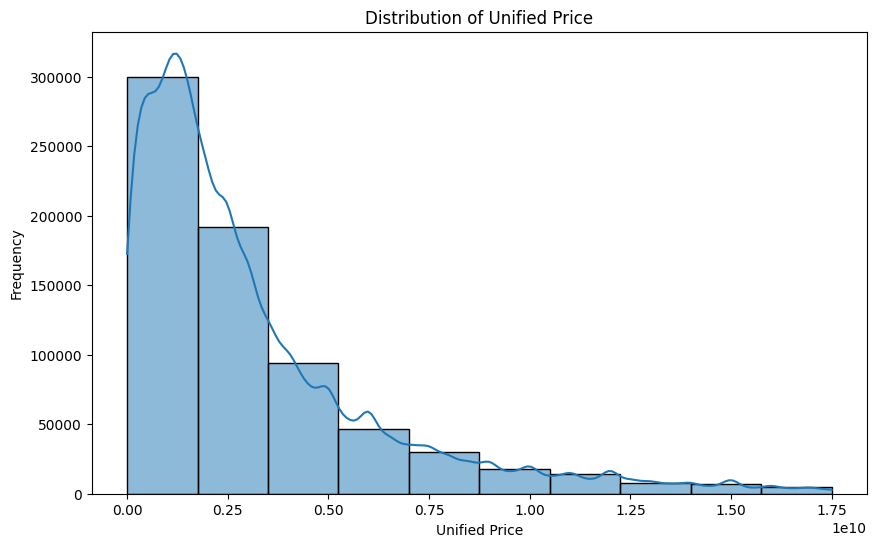

In [21]:
# Distribution of Unified Price
plt.figure(figsize=(10, 6))
sns.histplot(df['unified_price'].dropna(), kde=True, bins=10)
plt.title("Distribution of Unified Price")
plt.xlabel("Unified Price")
plt.ylabel("Frequency")
plt.show()

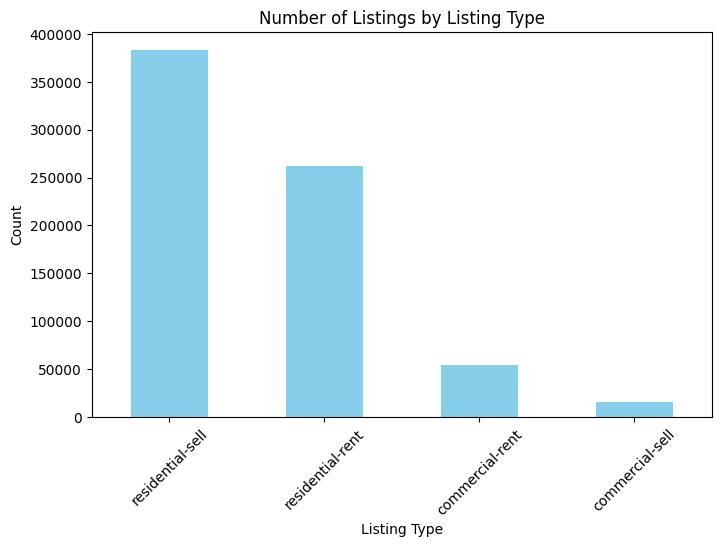

In [22]:
# Count of Listings by Listing Type
plt.figure(figsize=(8, 5))
df['listing_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Listings by Listing Type")
plt.xlabel("Listing Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

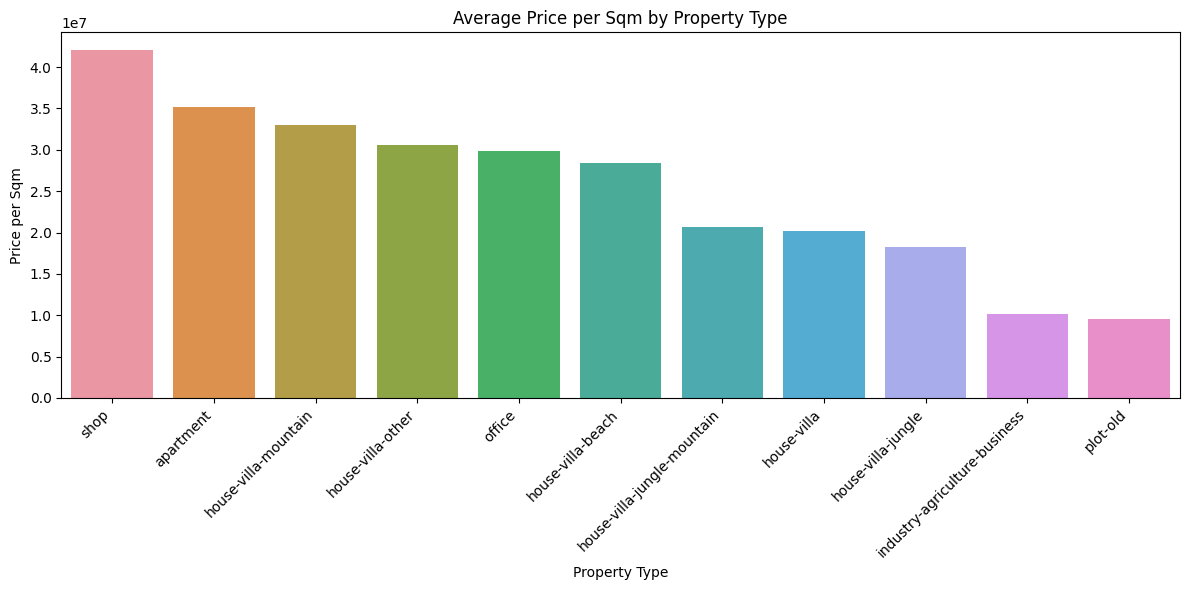

In [23]:
# Average Price per Sqm by Property Type
plt.figure(figsize=(12, 6))
avg_price_per_type = df.groupby('property_type')['price_per_sqm'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_per_type.index, y=avg_price_per_type.values)
plt.title("Average Price per Sqm by Property Type")
plt.ylabel("Price per Sqm")
plt.xlabel("Property Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: ylabel='property_type'>

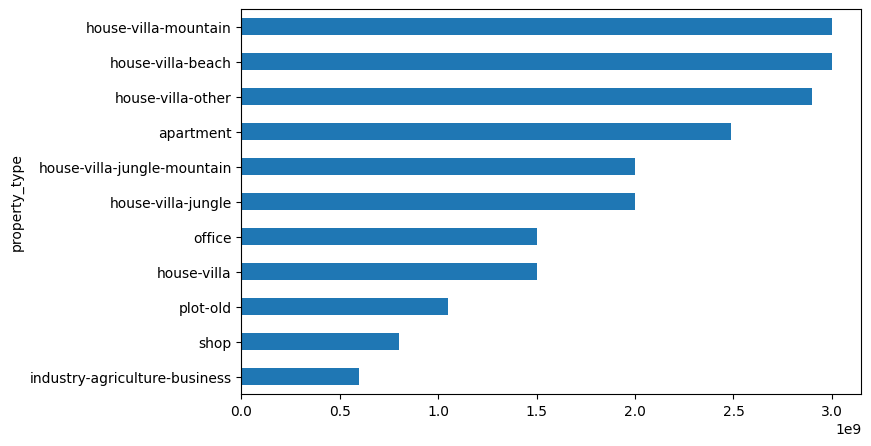

In [24]:
# Plot the median unified_price for each property_type as a horizontal bar chart (sorted by price)
df.groupby('property_type')['unified_price'].median().sort_values().plot(kind='barh', figsize=(8,5))

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


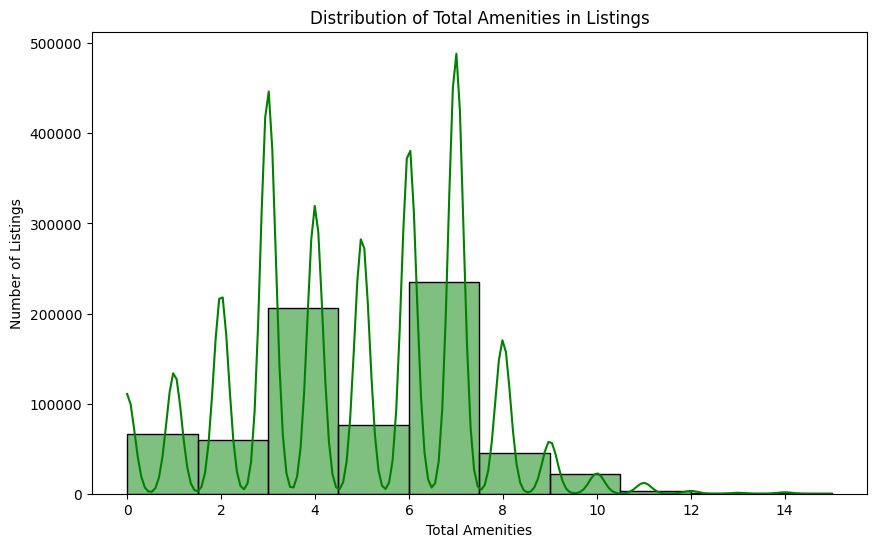

In [25]:
# Distribution of Total Amenities
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amenities'].dropna(), bins=10, kde=True, color='green')
plt.title("Distribution of Total Amenities in Listings")
plt.xlabel("Total Amenities")
plt.ylabel("Number of Listings")
plt.show()

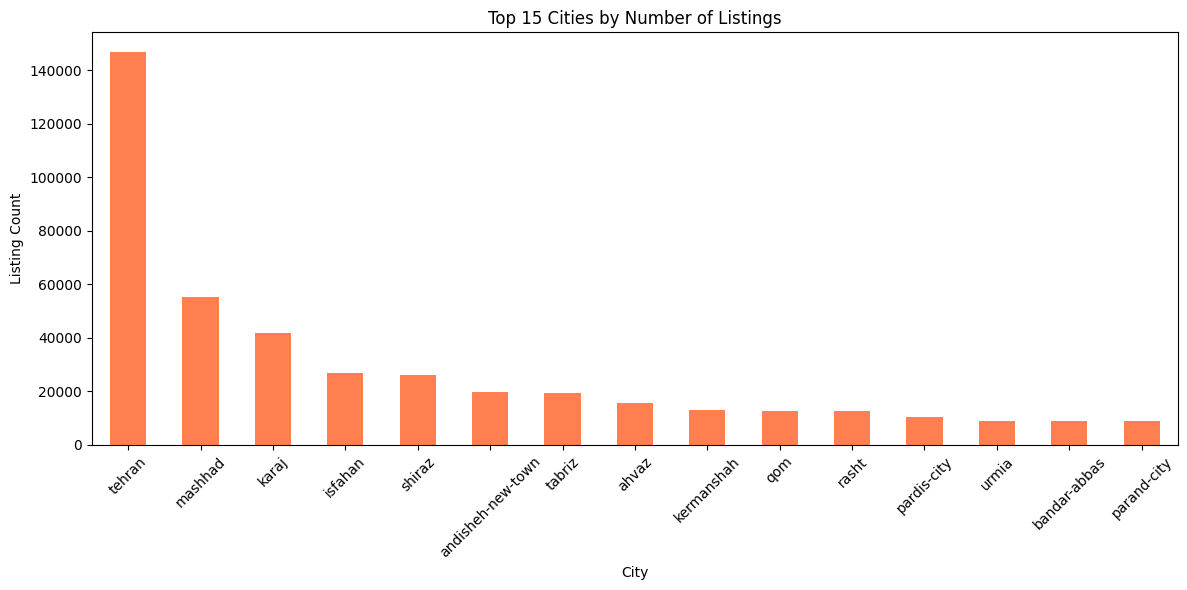

In [26]:
# Top Cities by Number of Listings
top_cities = df['city_slug'].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='coral')
plt.title("Top 15 Cities by Number of Listings")
plt.xlabel("City")
plt.ylabel("Listing Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


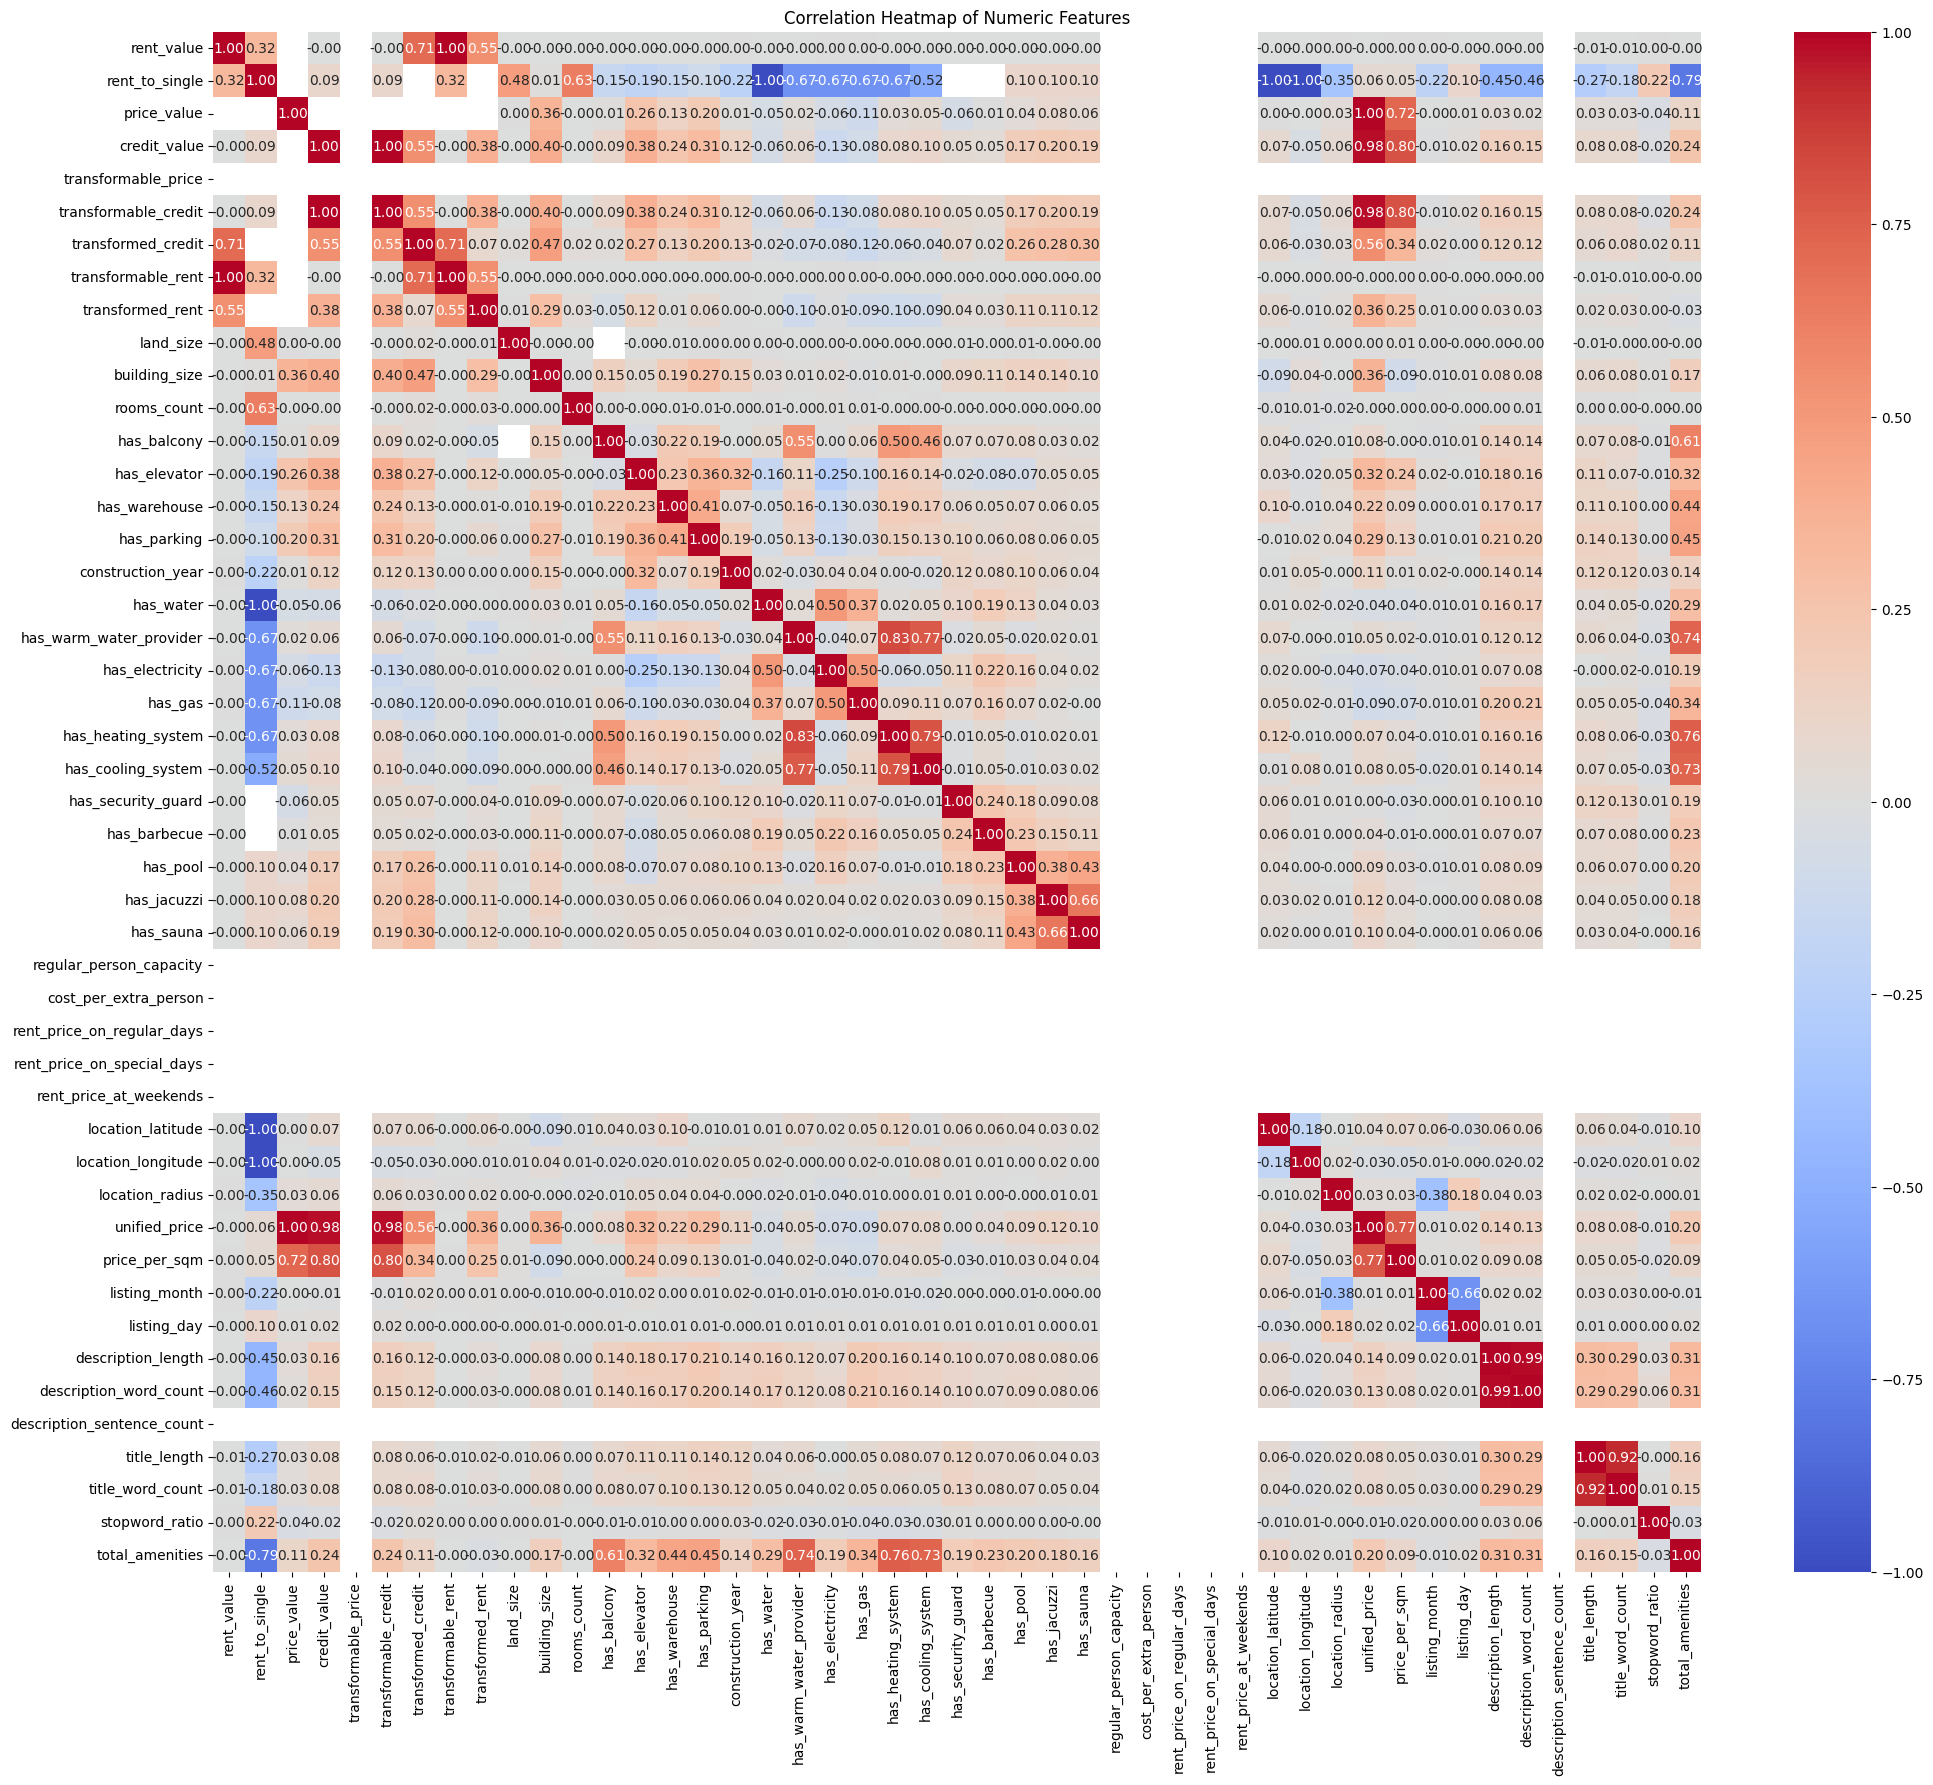

In [27]:
# Correlation Heatmap of Numeric Features
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(24, 20))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Text(0, 0.5, 'Final Price')

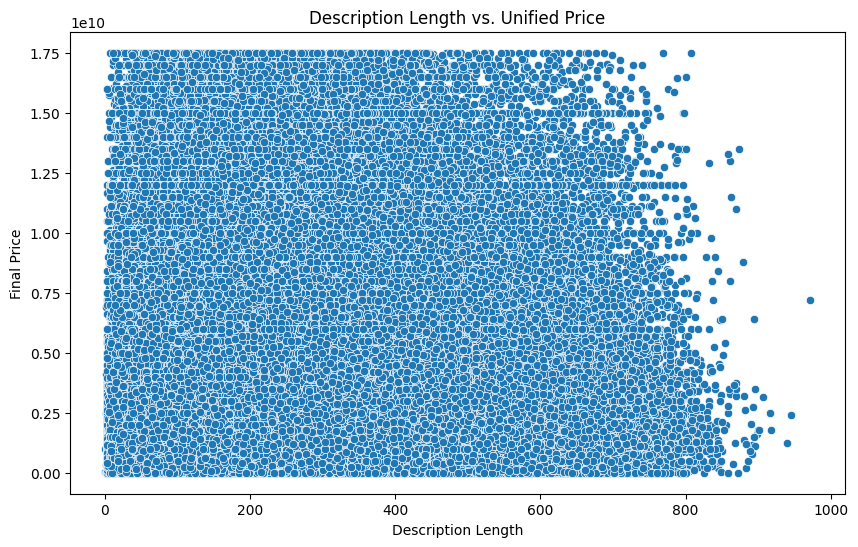

In [28]:
# Description Length vs. Final Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['description_length'], y=df['unified_price'])
plt.title("Description Length vs. Unified Price")
plt.xlabel("Description Length")
plt.ylabel("Final Price")

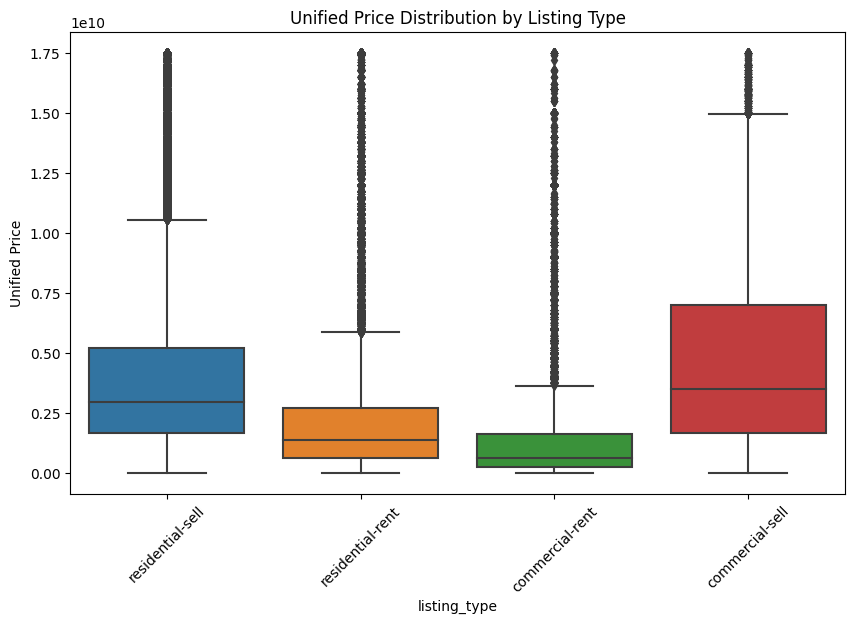

In [29]:
# Boxplot: Unified Price by Listing Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='listing_type', y='unified_price')
plt.title("Unified Price Distribution by Listing Type")
plt.ylabel("Unified Price")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


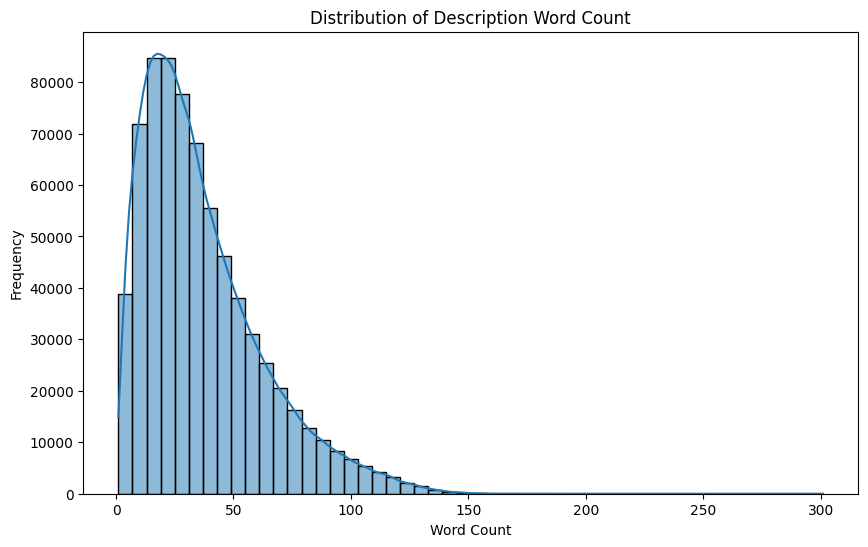

In [30]:
# Word Count in Descriptions
plt.figure(figsize=(10, 6))
sns.histplot(df['description_word_count'], kde=True, bins=50)
plt.title("Distribution of Description Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


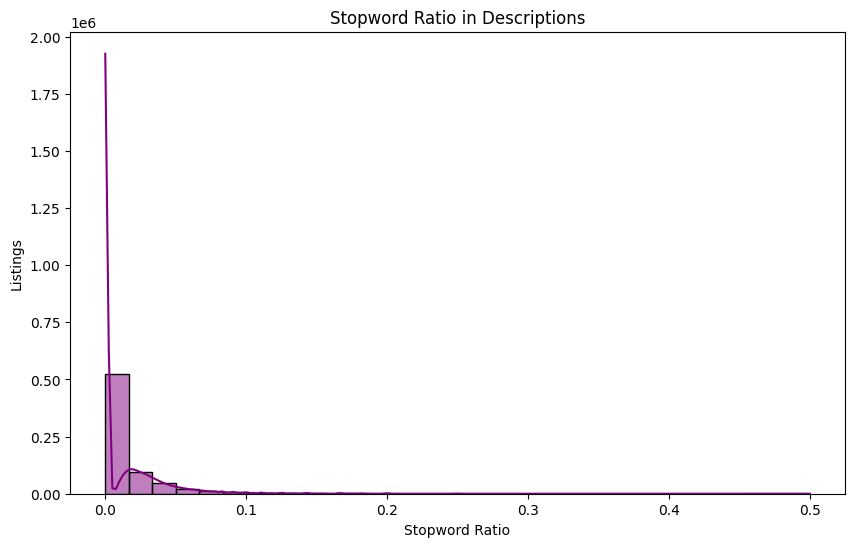

In [31]:
# Ratio of Stopwords in Descriptions
plt.figure(figsize=(10, 6))
sns.histplot(df['stopword_ratio'], bins=30, color='purple', kde=True)
plt.title("Stopword Ratio in Descriptions")
plt.xlabel("Stopword Ratio")
plt.ylabel("Listings")
plt.show()

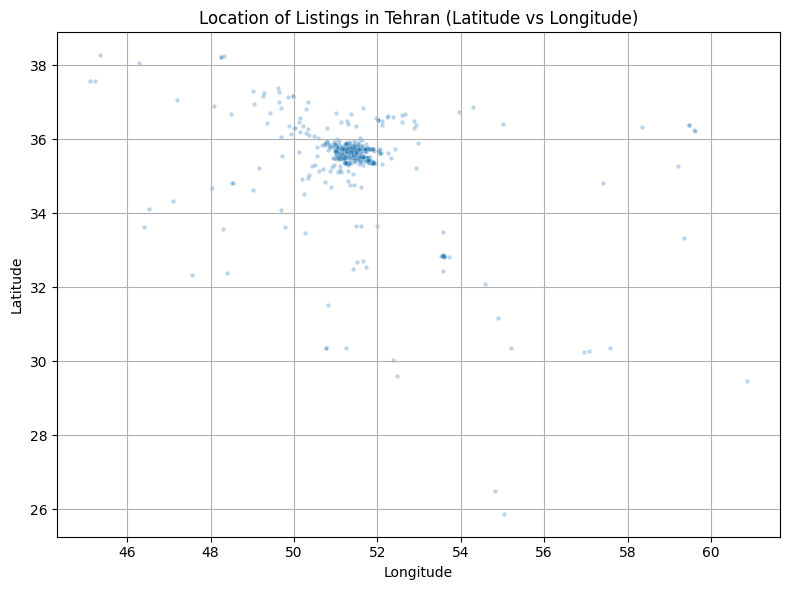

In [32]:
# Filter for city = Tehran and plot latitude vs longitude
tehran_df = df[df['city_slug'] == 'tehran']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tehran_df, x='location_longitude', y='location_latitude', alpha=0.3, s=10)
plt.title("Location of Listings in Tehran (Latitude vs Longitude)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


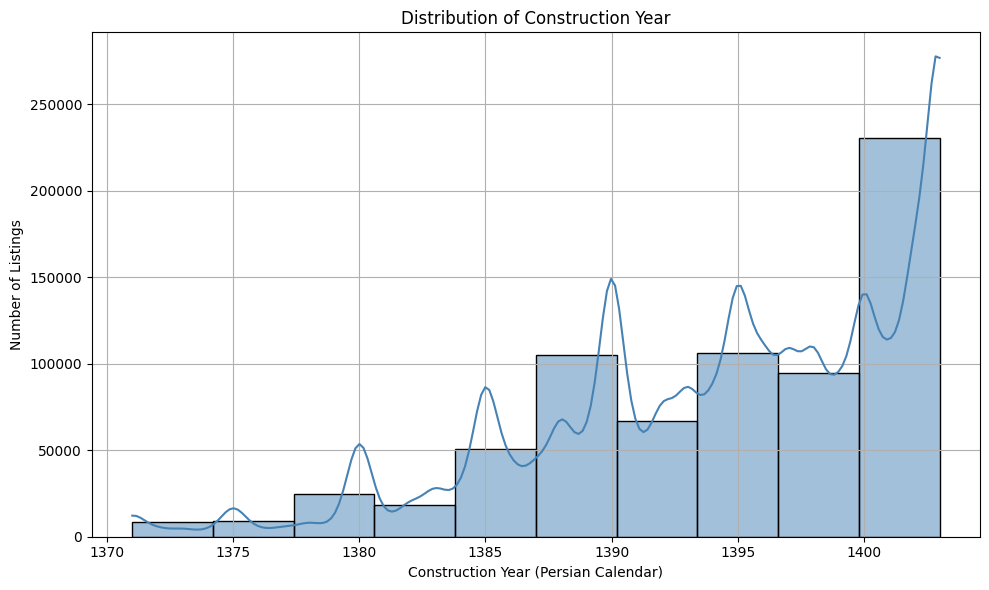

In [33]:
#  Construction year distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='construction_year', bins=10, kde=True, color="steelblue")
plt.title("Distribution of Construction Year")
plt.xlabel("Construction Year (Persian Calendar)")
plt.ylabel("Number of Listings")
plt.grid(True)
plt.tight_layout()
plt.show()